Daniel Conrado Monroy Madrid 16012674

In [1]:
import numpy as np
import imageio as imio
import matplotlib.pyplot as plt

## Carga y normalización de la data

In [2]:
images_inception_features = './training_inception_features_array.npy'
training_image_labels_array = './training_image_labels_array.npy'
training_image_names_array = './training_image_names_array.npy'

In [3]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array)
training_set_dict['label'] = np.load(training_image_labels_array)
training_set_dict['features'] = np.load(images_inception_features)

In [4]:
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [44]:
labels_unique = np.unique(labels)
print(len(labels_unique)) ## Esto permite conocer cuántas razas de perros contiene el dataset. 

120


In [5]:
features.shape

(10222, 2048)

In [6]:
labels.shape

(10222,)

Normalización de los datos:

In [8]:
from sklearn import preprocessing

In [19]:
stscaler = preprocessing.StandardScaler()
data_escalada = stscaler.fit_transform(features)

## Implementación PCA (2 dimensiones)

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)
pca.fit(data_escalada)

X2d = pca.fit_transform(data_escalada)

In [27]:
print(data_escalada.shape)
print(X2d.shape)

(10222, 2048)
(10222, 2)


Se aplica label enconder en las labels para poder graficar:

In [37]:
from sklearn import preprocessing

In [42]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(labels)
labels_enc = label_encoder.transform(labels)

In [46]:
print(labels_enc)  ## Cada número representa una raza

[19 37 85 ...  3 75 28]


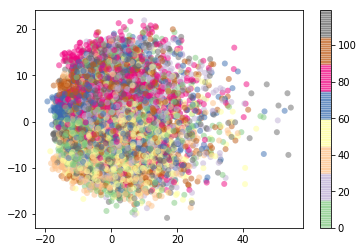

In [47]:
plt.scatter(X2d[:, 0], X2d[:, 1],
            c=labels_enc, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 120))
plt.colorbar()

## Clustering con versión reducida

In [49]:
from sklearn.cluster import KMeans

In [50]:
Kmeans = KMeans(n_clusters=120, random_state=0).fit(X2d)

In [51]:
Kmeans.predict(X2d)

array([57, 73, 27, ..., 12, 62, 21])

In [53]:
clustersk = Kmeans.cluster_centers_
print(clustersk)

[[  7.6743336    9.29617   ]
 [  1.4753094   -9.210258  ]
 [ -6.6190934   10.351367  ]
 [ 23.803526    -3.4026744 ]
 [ -9.852009    -1.2427182 ]
 [  0.4451169   -0.09711607]
 [ 11.212792   -11.358097  ]
 [ 34.748344     6.8018055 ]
 [ -8.054011    -7.029332  ]
 [  0.19192407  11.823028  ]
 [-12.356602   -10.228361  ]
 [ -8.348441     5.086293  ]
 [  9.565086    -0.3650166 ]
 [ 19.167591     3.827913  ]
 [-11.140168     4.509403  ]
 [  5.619405    -9.2198515 ]
 [ -4.3819094   -2.3669224 ]
 [ 11.290435    12.063707  ]
 [ -0.70254767   5.0736217 ]
 [  0.8357941   -5.9689054 ]
 [ -0.5194291  -12.485773  ]
 [ 22.161545   -16.154823  ]
 [  6.597794    -2.5465314 ]
 [ 46.764168    -2.1747816 ]
 [  4.788819    17.258778  ]
 [ 12.748824   -14.555137  ]
 [  6.4196796    4.2989054 ]
 [ 18.869257    16.742964  ]
 [ -7.233843    13.686018  ]
 [ -7.1320324  -12.480392  ]
 [-15.211074    -2.1404636 ]
 [ -3.8365664    9.715324  ]
 [  5.542126     7.504713  ]
 [ -8.614972     2.211593  ]
 [-10.747699  

In [54]:
Kmeans.cluster_centers_.shape

(120, 2)

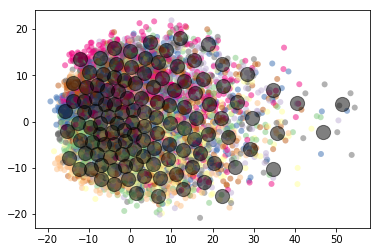

In [56]:
plt.scatter(X2d[:, 0], X2d[:, 1],
            c=labels_enc, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 120))
plt.scatter(clustersk[:, 0], clustersk[:, 1], c='black', s=200, alpha=0.5);